0.0

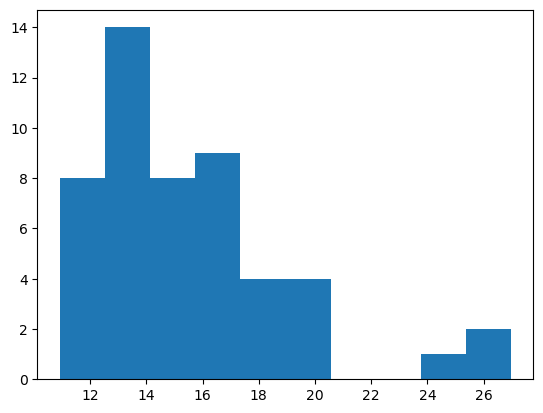

In [18]:
# Indlæs numpy, pandas og matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Starttider

# Filadresser til data
start_1_address = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 9 og 10 - biler\bdata.xlsx"
start_2_address = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 9 og 10 - biler\b2data.xlsx"

# Indlæs den anden kolonne i excel filerne
start_1 = pd.read_excel(start_1_address, usecols=[1])
start_2 = pd.read_excel(start_2_address, usecols=[1])

# Konverter til numpy arrays
start_1 = start_1.to_numpy()
start_2 = start_2.to_numpy()

# Gør det samme for sluttider
slut_1_address = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 9 og 10 - biler\Første.xlsx"
slut_2_address = r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\Lab 9 og 10 - biler\Anden.xlsx"

# Indlæs den anden kolonne i excel filerne
slut_1 = pd.read_excel(slut_1_address, usecols=[1])
slut_2 = pd.read_excel(slut_2_address, usecols=[1])

# Konverter til numpy arrays
slut_1 = slut_1.to_numpy()
slut_2 = slut_2.to_numpy()

l = 20

v = lambda t1, t2 : l/(t2-t1)
v_arr = v(start_2, slut_2)

plt.hist(v_arr)

sigma_v = np.std(v_arr)
np.std(sigma_v) / np.sqrt(len(v_arr))



Middelværdi af hastighed: 27.00 km/h

Usikkerhed på middelværdien af hastigheden: $\pm$ 2.00 km/h

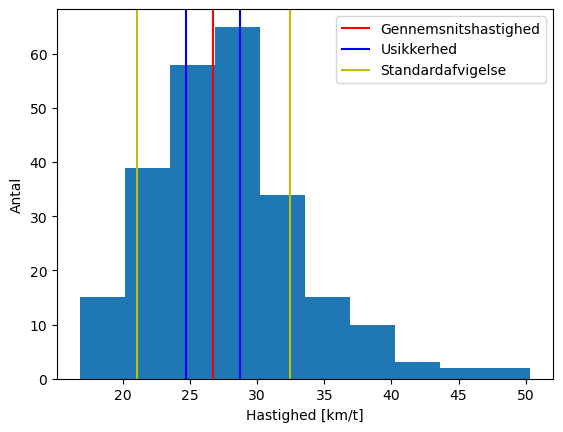

In [23]:
# Indlæs numpy, pandas og matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md, display_markdown

# Indlæs delta_tider
delta_tider1 = pd.read_excel(r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\torsdag1.xlsx").to_numpy()
delta_tider2 = pd.read_excel(r"C:\Users\marcu\OneDrive\Documents\GitHub\MekRelLab\torsdag2.xlsx").to_numpy()

delta_tider = np.append(delta_tider1, delta_tider2)

# Målt afstand
l = 6.03
# Usikkerhed på afstand [m]
dl = 0.5
# Usikkerhed på tid [s]
dt = 0.2

# Usikkerhed på middelværdi af tid
dt_middel = np.std(delta_tider) / np.sqrt(len(delta_tider))

# Gennemsnitlig hastighed
t_gennemsnit = np.mean(delta_tider)
v_gennemsnit = l / t_gennemsnit

# Brug ophobningsloven til at finde usikkerheden på hastigheden [m/s]
dv = int(round(np.sqrt(((1/t_gennemsnit)**2) * dl**2 + ((-l/t_gennemsnit**2)**2) *dt_middel**2)*3.6))

# Beregn hastigheder for hver tid
v_arr = (l / delta_tider)*3.6

# Standardafvigelse
sigma_v = np.std(v_arr) 

# Plot histogram med hastigheder, gennemsnitshastigheden og usikkerheden på den, samt standardafvigelse
plt.hist(v_arr)
plt.axvline(v_gennemsnit*3.6, color="r", label="Gennemsnitshastighed")
plt.axvline(v_gennemsnit*3.6 + dv, color="b", label="Usikkerhed")
plt.axvline(v_gennemsnit*3.6 - dv, color="b")
plt.axvline(v_gennemsnit*3.6 + sigma_v, color="y", label="Standardafvigelse")
plt.axvline(v_gennemsnit*3.6 - sigma_v, color="y")
plt.legend()
plt.xlabel("Hastighed [km/t]")
plt.ylabel("Antal")
plt.show()

# Print resultater
display_markdown(md(f"Middelværdi af hastighed: {round(v_gennemsnit*3.6):.2f} km/h"))
display_markdown(md(r"Usikkerhed på middelværdien af hastigheden: $\pm$ {:.2f} km/h".format(dv)))
display_markdown(md(r"Standardafvigelse: $\pm$ {:.2f} km/h".format(sigma_v)))
